In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.3 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.3 MB 4.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.3 MB 3.8 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.3 MB 3.4 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.3 MB 3.2 MB/s eta 0:00:03
   ------------- -------------------------- 3.9/11.3 MB 3.3 MB/s eta 0:00:03
   ------------- -------------------------- 3.9/11.3 MB 3.3 MB/s eta 0:00:03
   -------------- ------------------------- 4.2/11.3 MB 2.8 MB/s eta 0:00:03
   --------------- ------------------------ 4.5/11.3 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 4.7/11.3 MB 2.2 MB/s eta 0:00:04
   ---------------- ----------------------- 4.7/11.3 MB 2.2 MB/s eta 0:00:04
   ----------------- ---------------------- 5.0/11.3 MB 2.0 MB/s eta 0:00:04
   ---

In [4]:
# ----------------------------------------
# IMPORT LIBRARIES
# ----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
df = pd.read_csv("Supermarket Sales 2.csv")   # CHANGE THIS
df.head()


,Date,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating
0,1/1/2024,Brooklyn,Member,Female,Food & Beverages,84.63,10,Credit card,9.0
1,1/1/2024,Queens,Normal,Female,Electronics,63.22,2,Cash,8.5
2,1/1/2024,Brooklyn,Normal,Female,Electronics,74.71,6,Cash,6.7
3,1/1/2024,Queens,Member,Female,Sports & Travel,36.98,10,Credit card,7.0
4,1/1/2024,Manhattan,Member,Female,Sports & Travel,27.04,4,Ewallet,6.9


In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5053 non-null   object 
 1   Branch         5053 non-null   object 
 2   Customer type  5053 non-null   object 
 3   Gender         5053 non-null   object 
 4   Product line   5053 non-null   object 
 5   Unit price     5053 non-null   float64
 6   Quantity       5053 non-null   int64  
 7   Payment        5053 non-null   object 
 8   Rating         5053 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 355.4+ KB


Date             0
Branch           0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Payment          0
Rating           0
dtype: int64

In [7]:
df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum()


Date             0
Branch           0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Payment          0
Rating           0
dtype: int64

In [8]:
label_encoders = {}

for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

df.head()


,Date,Branch,Customer type,Gender,Product line,Unit price,Quantity,Payment,Rating
0,0,0,0,0,2,84.63,10,1,9.0
1,0,2,1,0,0,63.22,2,0,8.5
2,0,0,1,0,0,74.71,6,0,6.7
3,0,2,0,0,5,36.98,10,1,7.0
4,0,1,0,0,5,27.04,4,2,6.9


In [10]:

df.columns


Index(['Date', 'Branch', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Payment', 'Rating'],
      dtype='object')

In [11]:
target = "YOUR_TARGET_COLUMN"


In [12]:
target = "Customer type"

X = df.drop(target, axis=1)
y = df[target]


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Accuracy: 0.5677546983184966
              precision    recall  f1-score   support

           0       0.44      0.41      0.42       395
           1       0.64      0.67      0.65       616

    accuracy                           0.57      1011
   macro avg       0.54      0.54      0.54      1011
weighted avg       0.56      0.57      0.56      1011



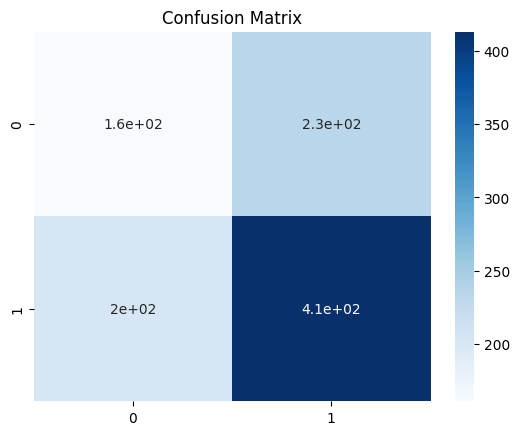

In [16]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [17]:
cv = cross_val_score(knn, X_scaled, y, cv=5)
print("Cross Validation Scores:", cv)
print("Mean CV Score:", cv.mean())


Cross Validation Scores: [0.51335312 0.5529179  0.60039565 0.51980198 0.47524752]
Mean CV Score: 0.5323432343234324


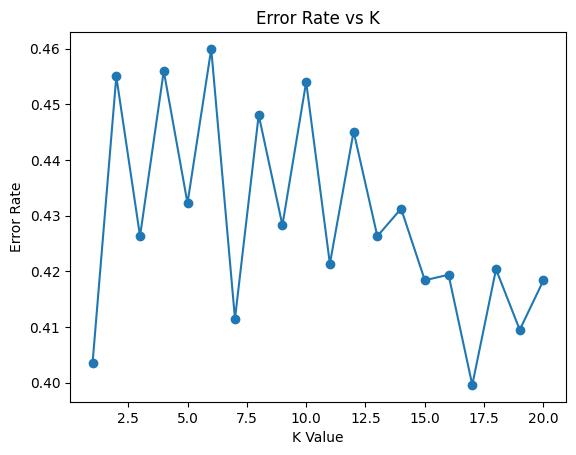

In [18]:
error_rate = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, pred))

plt.plot(range(1, 21), error_rate, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")
plt.show()
